# **HEART** **DISEASE** **PREDICTION** **MODEL**

Name: Nihala Nusrin P.A


Organization: Entri Elevate

Date: 19-04-2025

##**1.** **Overview** **of** **the** **Problem** **Statement**:

Heart disease refers to various conditions affecting the heart, including coronary artery disease, arrhythmias, and heart failure. It is a leading cause of death worldwide, making early detection and prevention crucial.A heart disease prediction model helps assess an individual's risk of developing cardiovascular conditions based on medical and lifestyle factors. By using machine learning or statistical models, healthcare professionals can make data-driven decisions for early intervention and treatment.

##**2.** **Objective**:

To predict the risk of cardiovascular disease (CVD) based on various health parameters. By leveraging this dataset, we can develop models to assess heart disease risk and identify key contributing factors.


##**3**. **Data** **Description**:

### **Source**: Data World

### **Features in the dataset**:

The dataset contains **70,000** rows with **13** columns related to cardiovascular health indicators.Here all columns are numerical.

**1. id** – Unique identifier for each record

**2. age** – Age in days

**3. gender** – Gender (1 = Female, 2 = Male)

**4. height** – Height in cm

**5. weight** – Weight in kg

**6. ap_hi** – Systolic blood pressure

**7. ap_lo** – Diastolic blood pressure

**8. cholesterol** – Cholesterol level (1 = Normal, 2 = Above Normal, 3 = Well Above Normal)

**9. gluc** – Glucose level (1 = Normal, 2 = Above Normal, 3 = Well Above Normal)

**10. smoke** – Smoking status (0 = No, 1 = Yes)

**11. alco** – Alcohol intake (0 = No, 1 = Yes)

**12. active** – Physical activity (0 = No, 1 = Yes)

**13. cardio** – Presence of cardiovascular disease (0 = No, 1 = Yes)

### **Target Variable**: Cardio

## **4. Data Collection**

###**Dataset link**:https://data.world/kudem/heart-disease-dataset/workspace/file?filename=heart_data.csv

In [103]:
from google.colab import files
data_to_load = files.upload()

Saving heart_data.csv to heart_data (1).csv


### **Import necessary libraries**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

### **Loading dataset**

In [ ]:
data = pd.read_csv('heart_data.csv')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
#displaying first 5 rows
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#displaying last 5 rows
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


## **5. Data Preprocessing- Data Cleaning**

In [ ]:
#We have to convert age column from days to years
data["age"] = (data["age"] / 365).astype(int)
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
#Data Overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
#no of rows and columns
data.shape

(70000, 13)

In [ ]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


####**Mean>50% - which means positively skewed**
####**Mean<50% - which means negatively skewed**

**Outliers** are present in the numerical columns such as **age, height, weight, ap_hi** (systolic blood pressure), and **ap_lo** (diastolic blood pressure). Additionally, the data exhibits skewness, which indicates that the distribution of values is not symmetric. Several columns are **negatively skewed**, including **id, age, height, and active**, where the majority of values are concentrated on the higher end of the distribution. Conversely, features such as **gender, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, and alco** show **positive skewness**, meaning most values are clustered toward the lower end with a long tail to the right.

###**id column is not necessary for model building, so we have to drop it**

In [ ]:
data.drop(['id'],axis=1,inplace= True)
print('Remaining columns are : ',data.columns)

Remaining columns are :  Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [ ]:
#displaying dataset again
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


### **Checking missing values**

In [ ]:
print("Missing values in each column:\n")
data.isnull().sum()

Missing values in each column:



,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0


####**There is no null values in the dataset.**

###**Checking duplicates**

In [ ]:
data.duplicated().sum()

np.int64(0)

###**There is no duplicates.**

###**Checking Outliers**

In [ ]:
num_data= data.select_dtypes('number')
num_data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
num_cols = list(num_data)
num_cols

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [ ]:
#checking skewness
num_data.skew()

,0
age,-0.305744
gender,0.630960
height,-0.642187
weight,1.012070
ap_hi,85.296214
ap_lo,32.114083
cholesterol,1.587123
gluc,2.397462
smoke,2.905867
alco,3.956607


###**Symmetrical Distribution: Skewness is around 0.**

###**Moderately Skewed: Skewness between -0.5 and 0.5.**

###**Highly Skewed: Skewness less than -1 or greater than 1.**


After checking skewness,we can see that the features age (-0.31), gender (0.63), height (-0.64), and weight (1.01) fall within an acceptable range, indicating relatively moderate skewness.These values suggest that while the distributions are not perfectly symmetrical, they are reasonably balanced and do not require immediate transformation.The features **ap_hi** (85.29) and **ap_lo** (32.11) exhibit extremely high positive skewness, indicating the presence of severe outliers, likely due to abnormal blood pressure readings. Similarly, **cholesterol** (1.58), **gluc** (2.39),**smoke** (2.90), and **alco** (3.96) are also right-skewed, suggesting the need for transformation or outlier handling. Conversely, **active** shows a strong negative skew (-1.53). These skewed distributions highlight the importance of addressing outliers to ensure more balanced and reliable data for modeling.


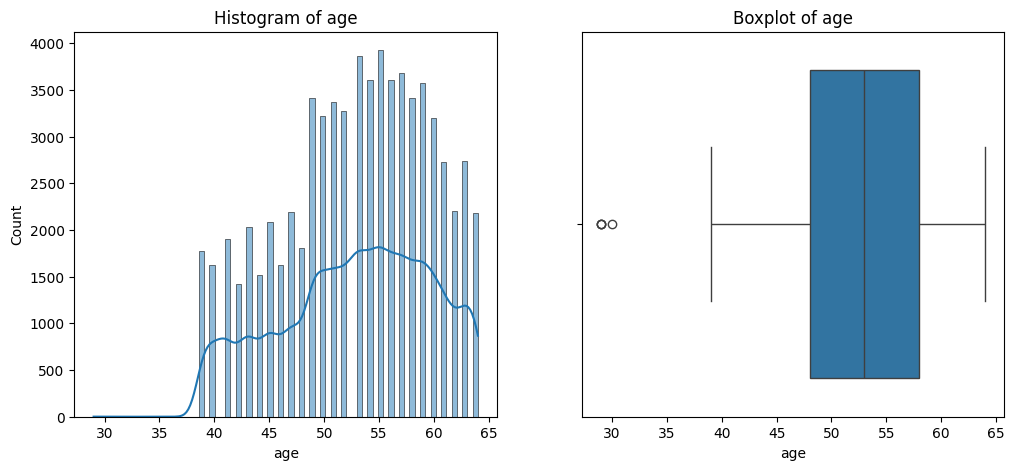

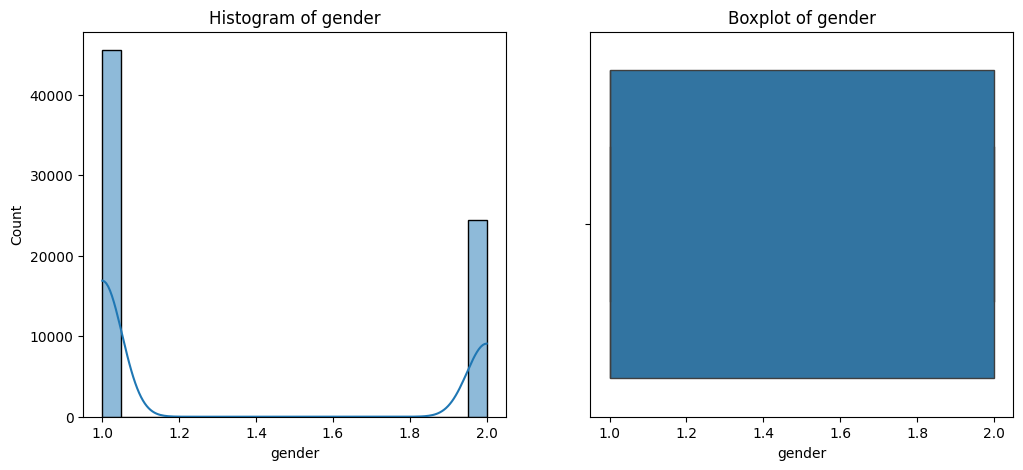

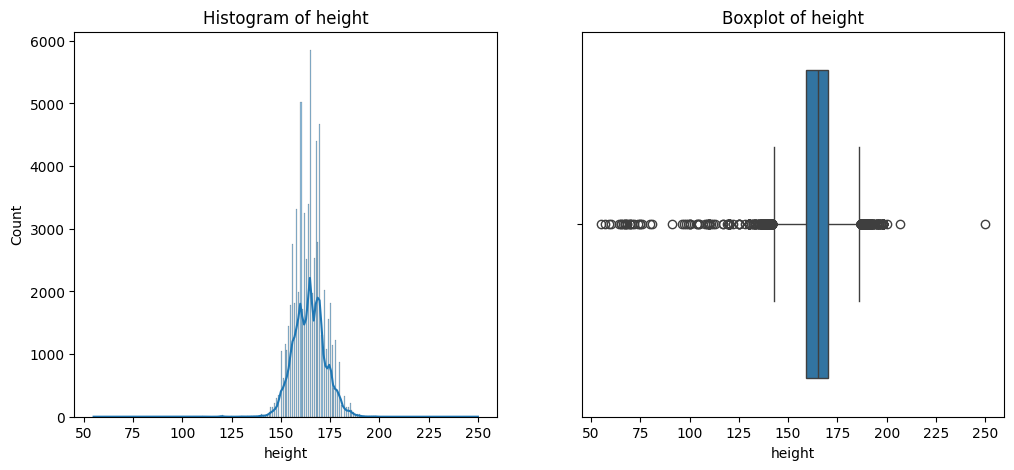

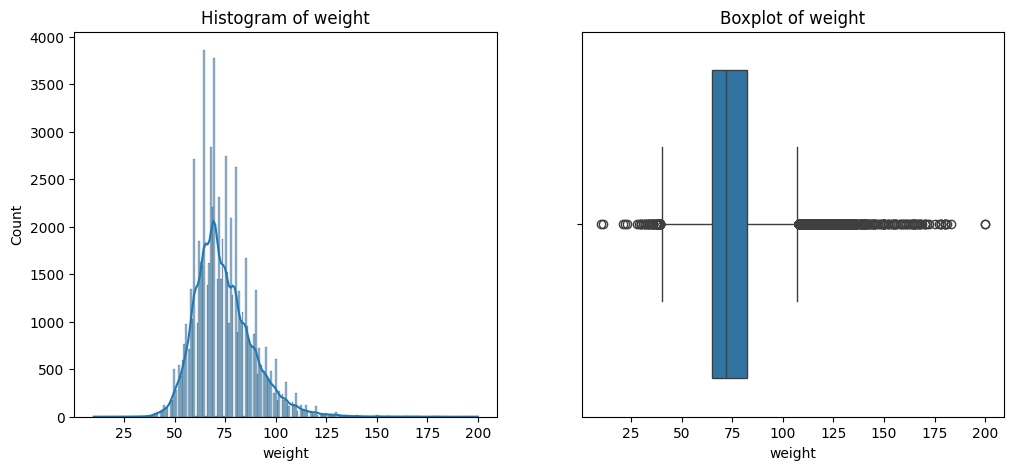

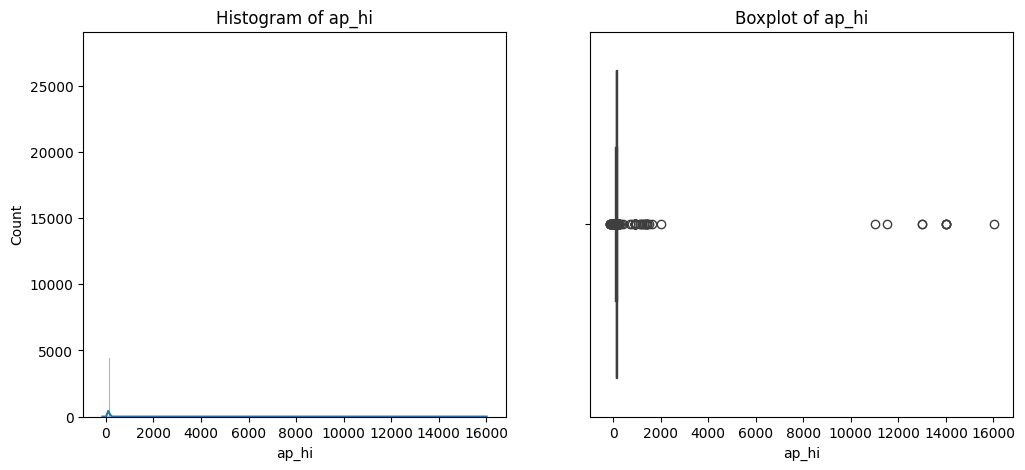

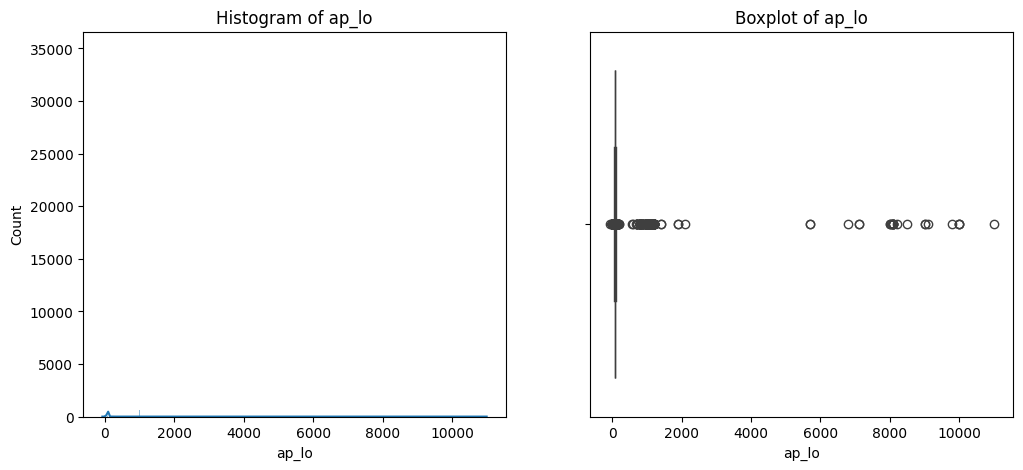

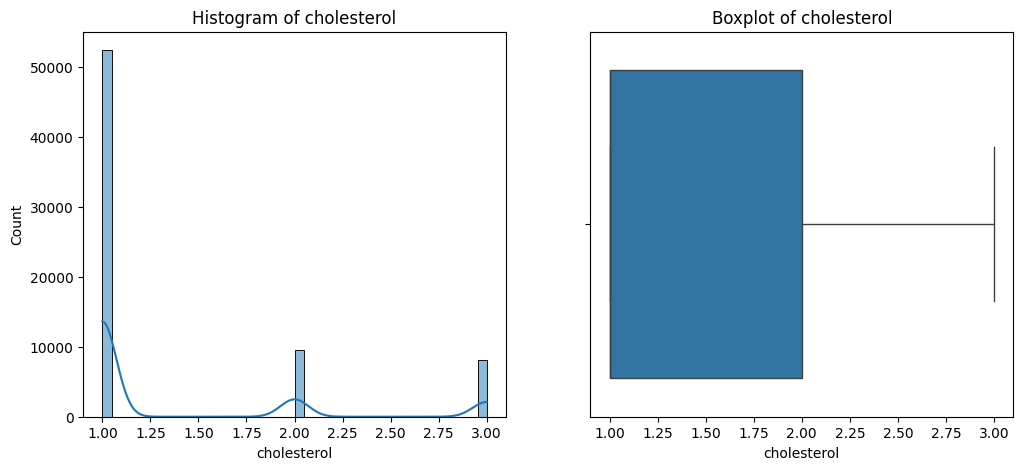

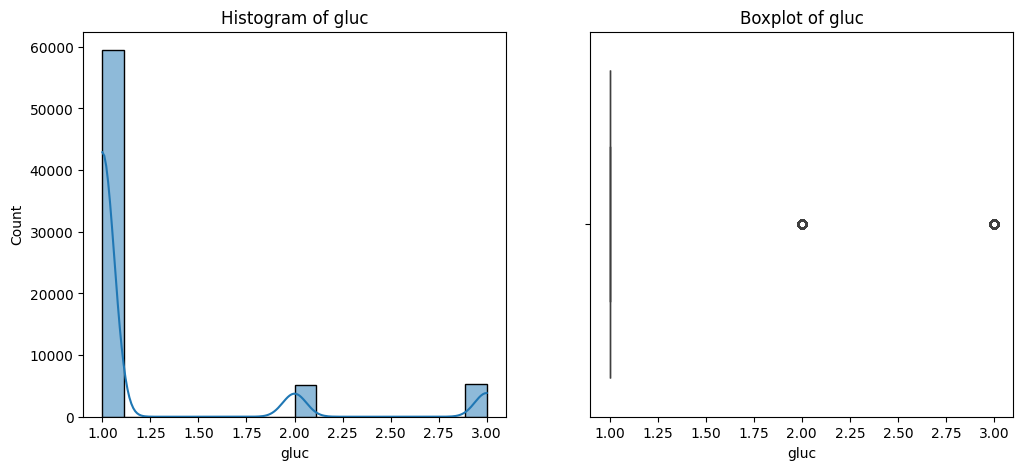

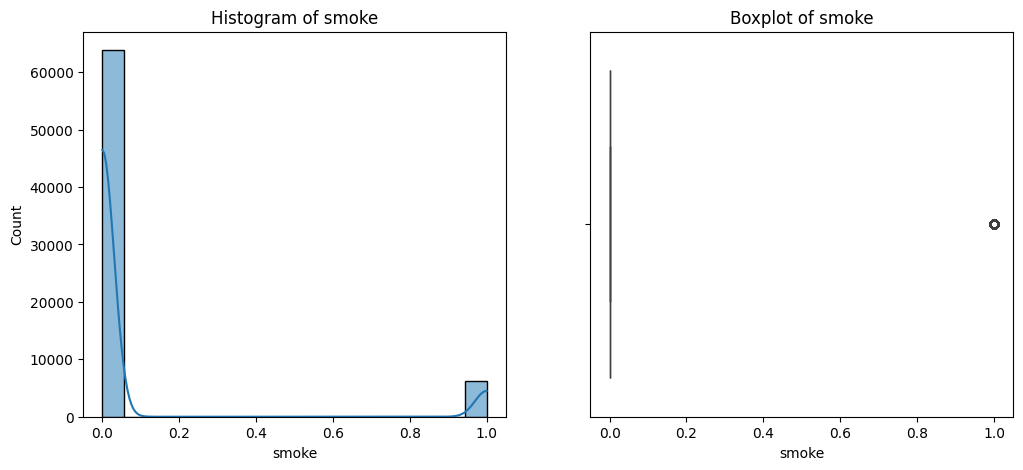

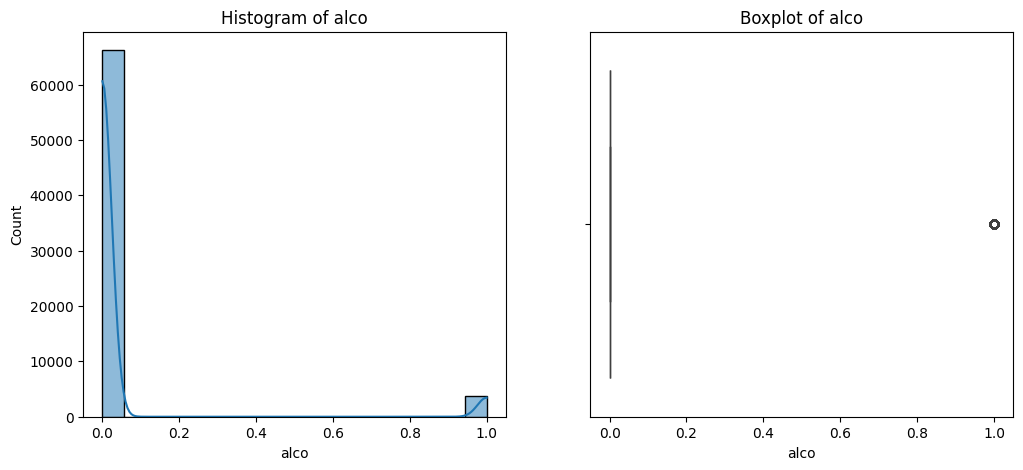

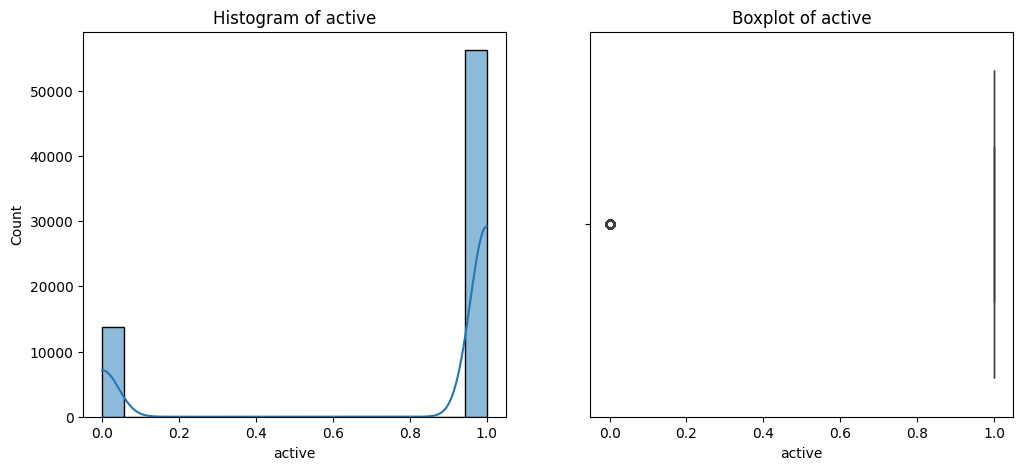

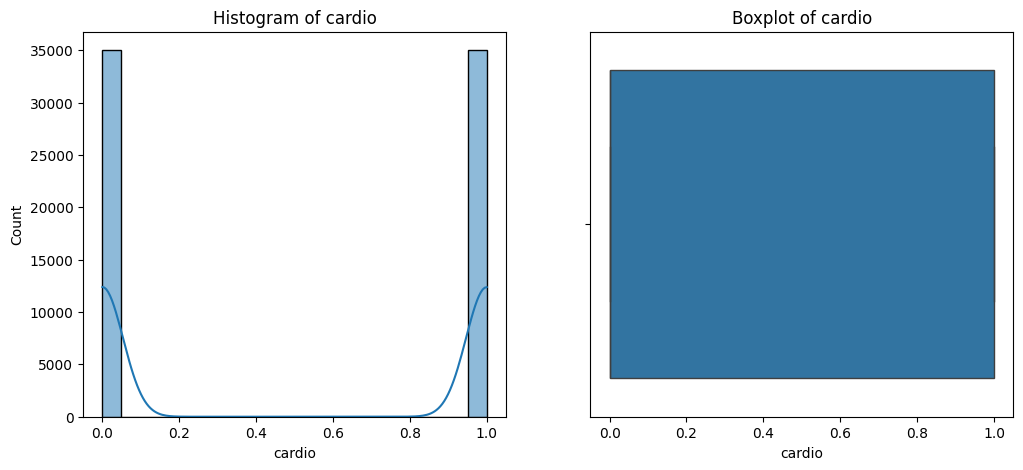

In [ ]:
for column in num_cols:
    plt.figure(figsize=(12,5))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(data[column],kde=True)
    plt.title(f'Histogram of {column}')

    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

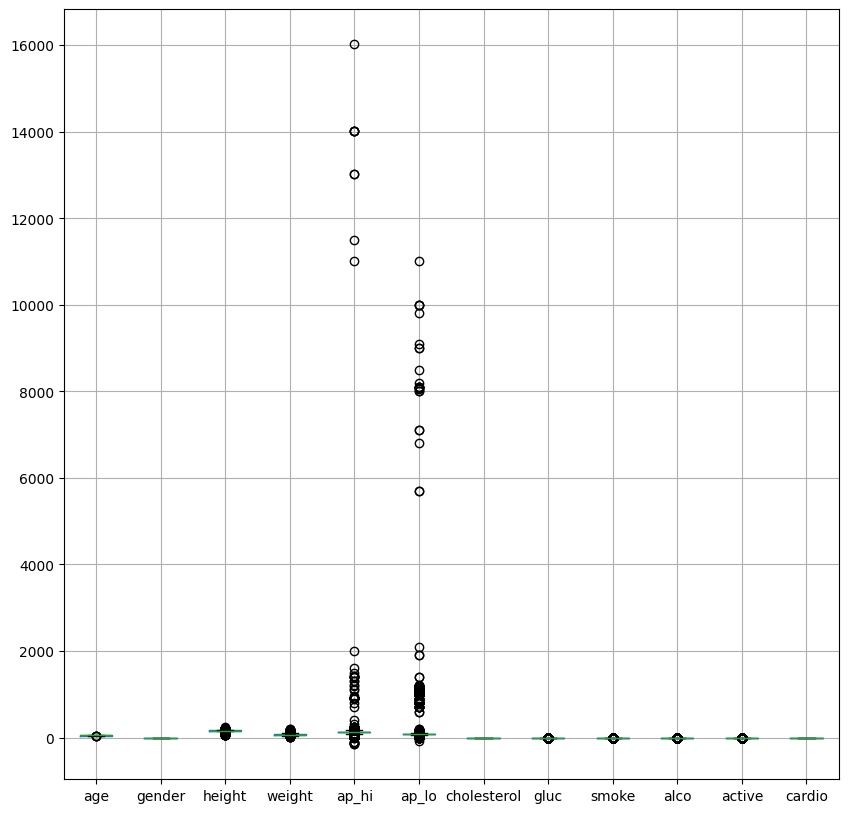

In [ ]:
#plot boxplot
data.boxplot(figsize=(10,10))
plt.show()

By examining the boxplot, we can clearly observe the presence of outliers in several numerical features. Outliers can negatively impact the performance of machine learning models by skewing distributions and influencing model parameters. To handle this issue, we apply the **Capping method.**

###**Capping** is used to handle outliers by limiting extreme values within a specified range. Instead of removing outliers, it replaces values beyond a threshold (like the 5th and 95th percentiles) with the nearest acceptable values.

In [ ]:
 def cap_outliers(data, columns, lower_q=0.05, upper_q=0.95):
    df_capped = data.copy()
    for col in columns:
        lower = df_capped[col].quantile(lower_q)
        upper = df_capped[col].quantile(upper_q)
        df_capped[col] = np.clip(df_capped[col], lower, upper)
    return df_capped

df_capped = cap_outliers(data, num_cols)
print(f"Capped outliers using 5th–95th percentiles.")

Capped outliers using 5th–95th percentiles.


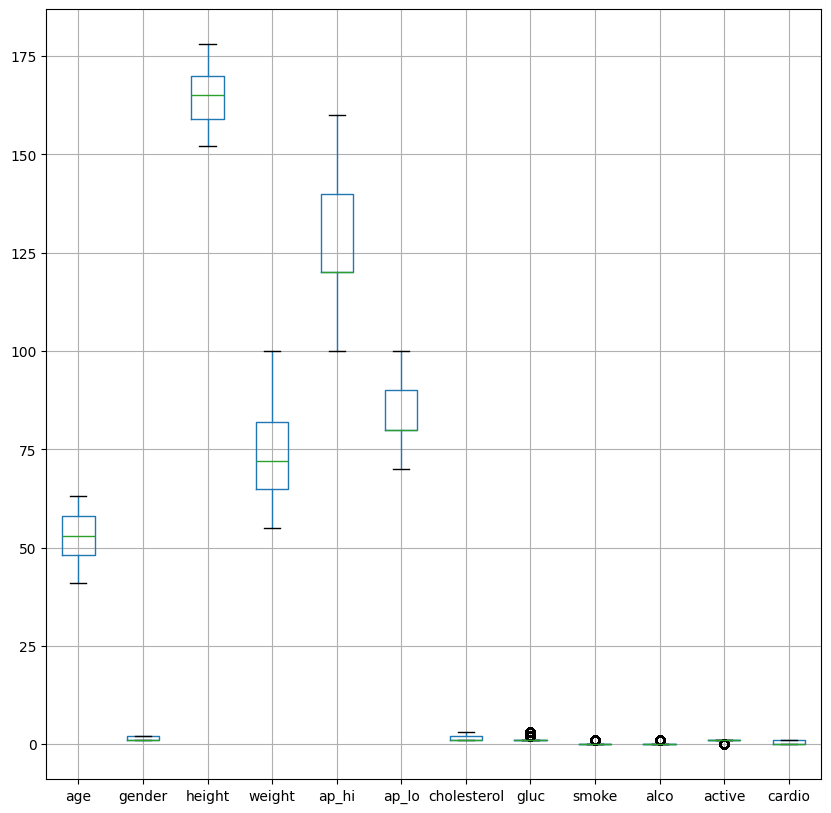

In [ ]:
#boxplot after capping
df_capped.boxplot(figsize=(10,10))
plt.show()

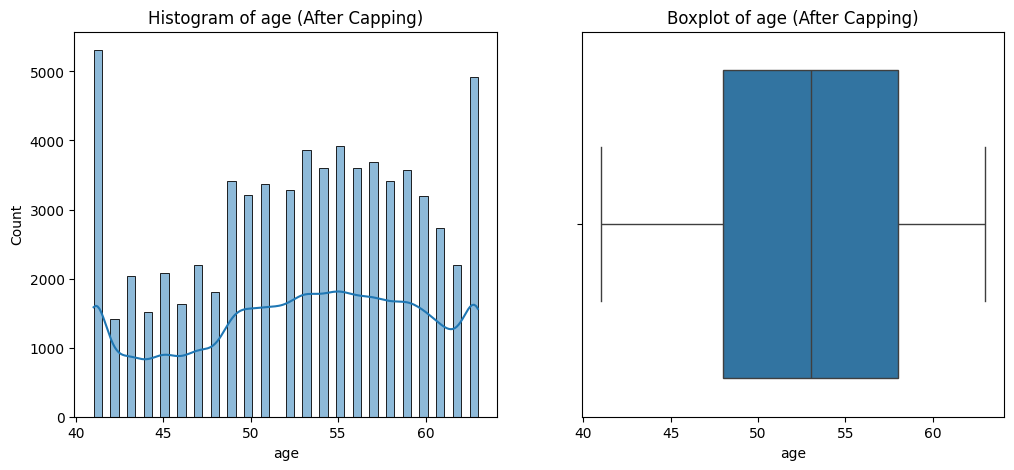

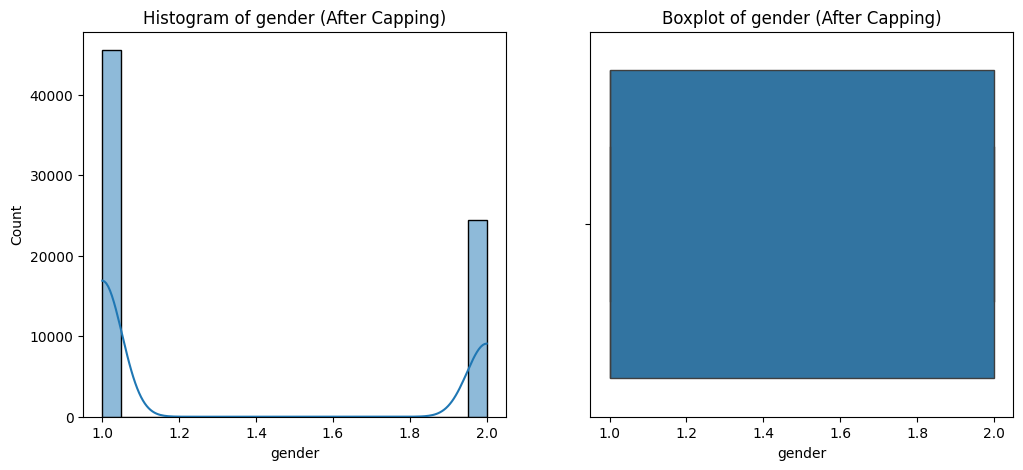

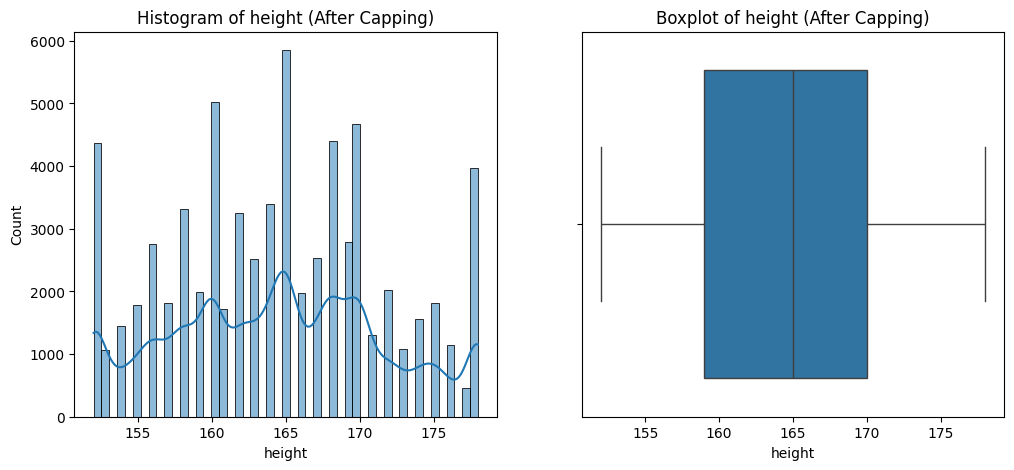

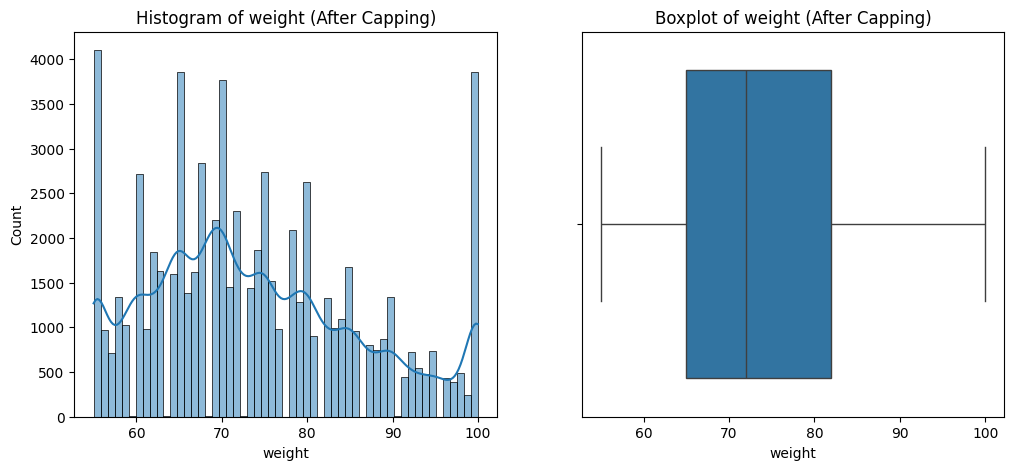

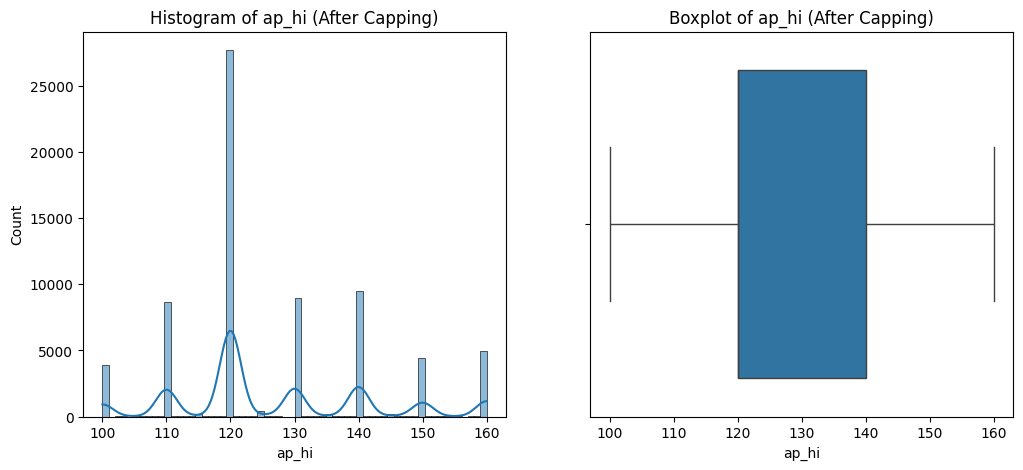

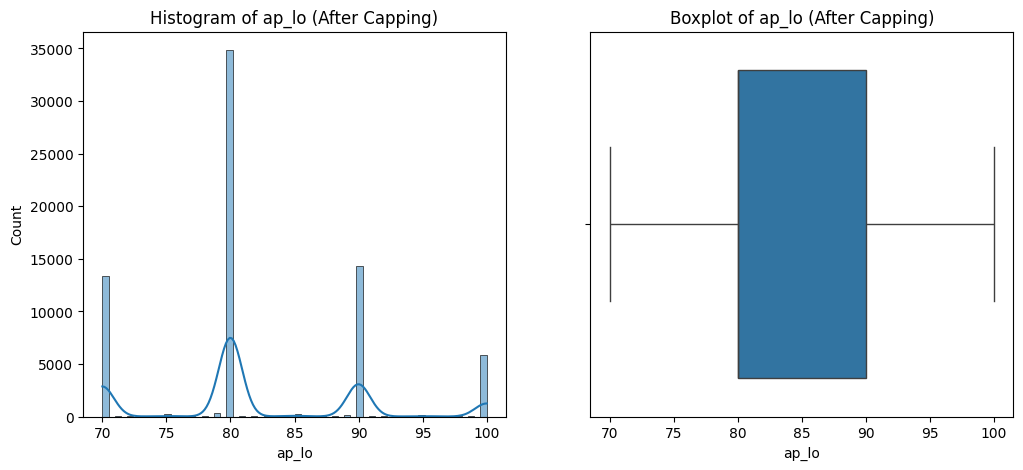

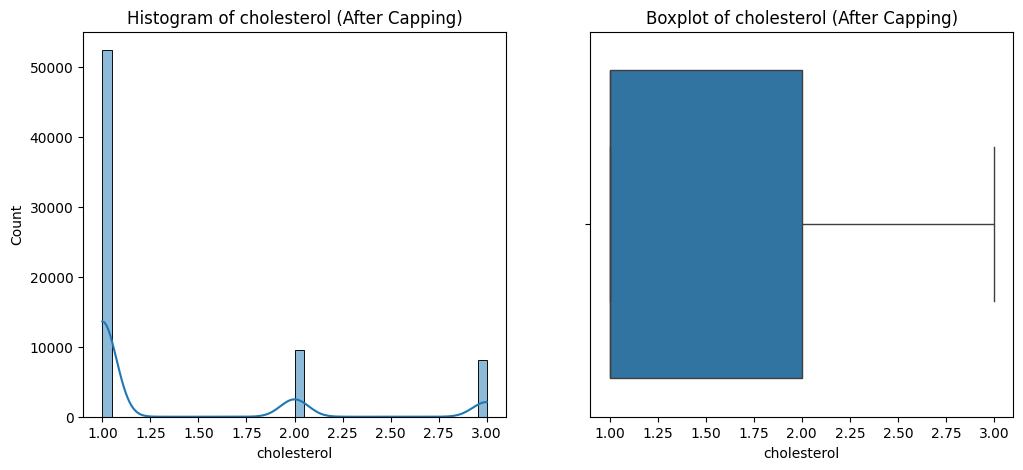

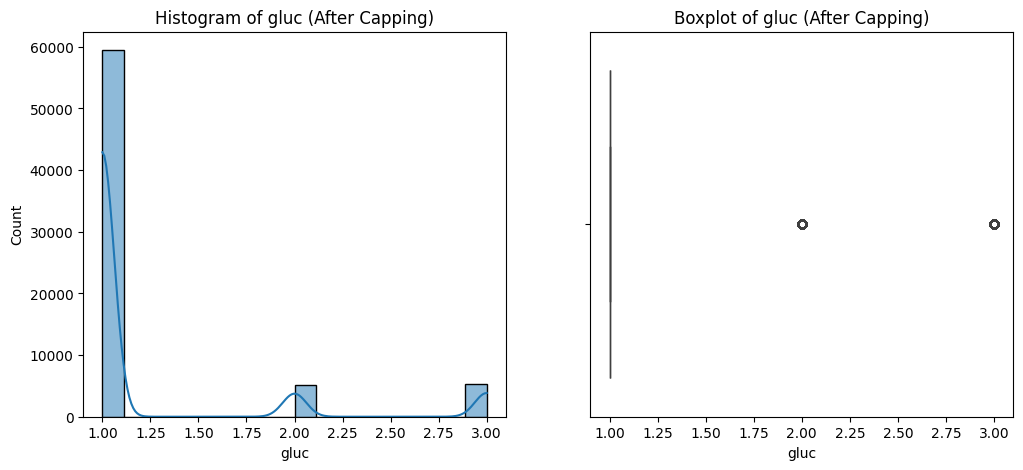

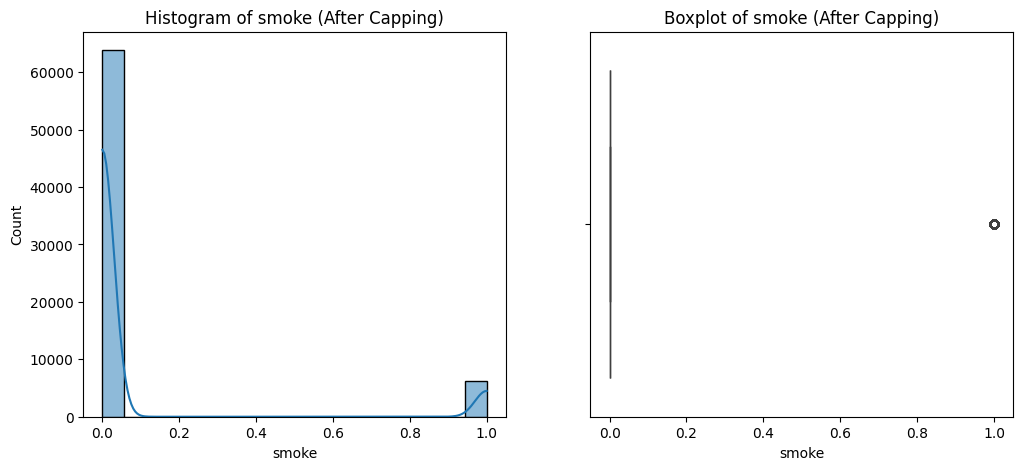

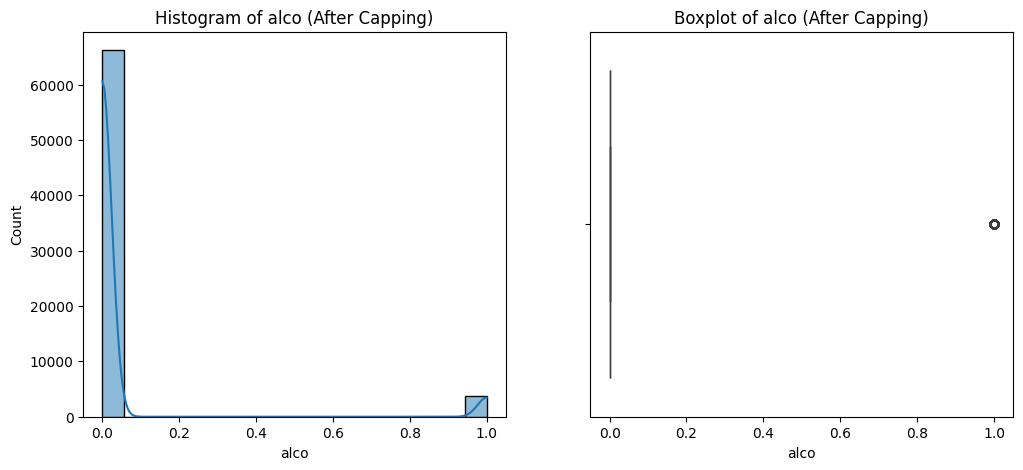

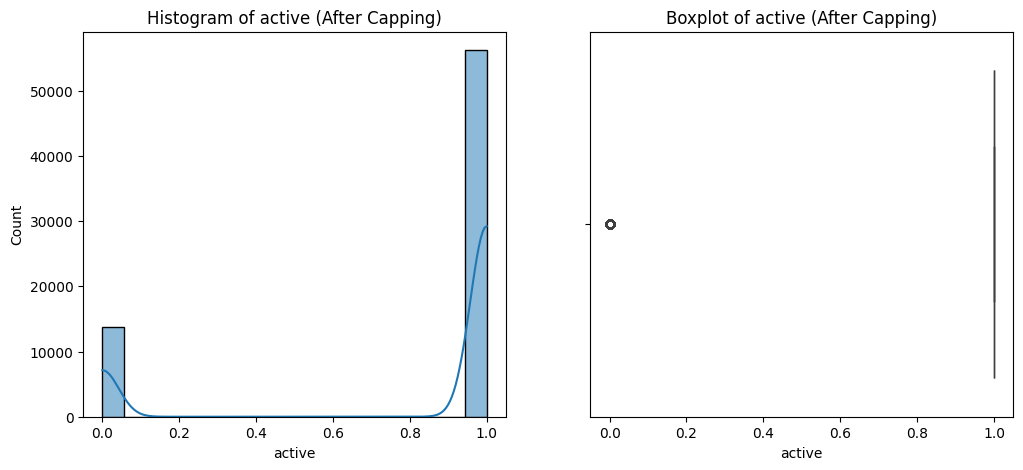

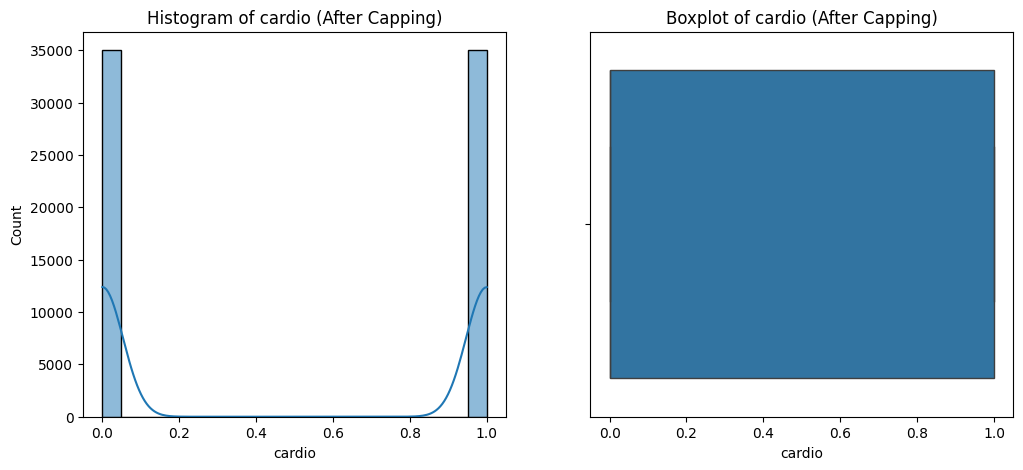

In [ ]:
# Visualize the data after capping
for column in df_capped:
    plt.figure(figsize=(12, 5))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_capped[column], kde=True)
    plt.title(f'Histogram of {column} (After Capping)')
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_capped[column])
    plt.title(f'Boxplot of {column} (After Capping)')
    plt.show()

Through this boxplot, we can observe that the majority of the outliers have been successfully capped. The presence of outliers is significantly reduced.

In [ ]:
#checking skewness after capping
df_capped.skew()

,0
age,-0.262445
gender,0.630960
height,0.085375
weight,0.476133
ap_hi,0.575170
ap_lo,0.487254
cholesterol,1.587123
gluc,2.397462
smoke,2.905867
alco,3.956607


After capping , the skewness of most features significantly improved. Variables such as **age** (-0.26), **height** (0.09), **weight** (0.48), **ap_hi** (0.58), and **ap_lo** (0.49) now show skewness within or near the acceptable range , indicating more symmetric distributions. **Gender** remains moderately skewed (0.63), which is still acceptable.

However, **cholesterol** (1.59), **gluc** (2.40), **smoke** (2.91), and **alco** (3.96) continue to exhibit high positive skewness, and **active** remains strongly left-skewed (-1.53).Since these features represent categorical levels rather than continuous ranges, skewness is less meaningful and usually does not require correction.The remaining skewness in binary and discrete features is acceptable and does not necessitate transformation.

In [ ]:
#checking shape
df_capped.shape

(70000, 12)

###**Data preprocessing is over**

##**6. Exploratory Data Analysis (EDA)**

###**Correlation heatmap**

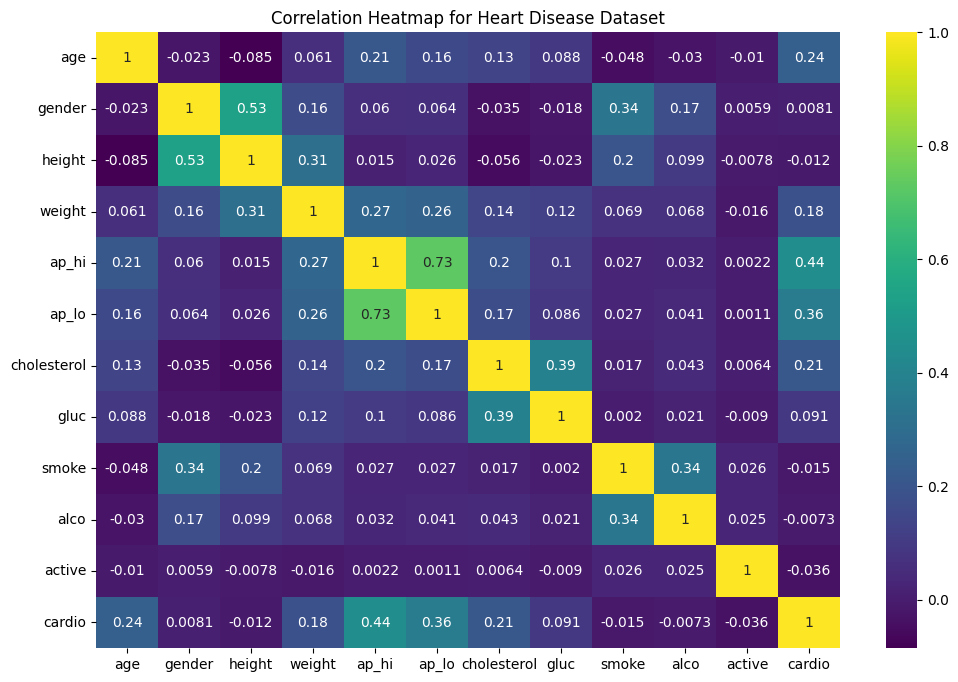

In [ ]:
# Compute the correlation matrix
corr_matrix = df_capped.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap for Heart Disease Dataset')
plt.show()


**Results**:

* **age**: Positively correlated with cardio, meaning older individuals are more likely to have cardiovascular disease.

* **ap_hi** & **ap_lo**: Strongly correlated with cardio, indicating that high blood pressure increases heart disease risk.

* **cholesterol** & **gluc**: Both show a moderate to strong positive correlation with cardio, suggesting that high cholesterol and glucose levels contribute to heart disease.

* **active**: Likely shows a weak or negative correlation, meaning active individuals tend to have a lower risk.

* **smoke & Alco**: Have Weak Correlation with Cardiovascular Disease.smoking and alcohol consumption do not show a strong correlation with cardiovascular disease in this dataset.

* **Weight**:Individuals with higher weight seem to have a greater risk of cardiovascular disease.

* **Height**: correlation between height and cardio is weak or close to zero in the heatmap.This means that height does not have a significant direct impact on the likelihood of cardiovascular disease.

* **gender**:correlation between gender and cardio is very weak or close to zero in the heatmap.


In [ ]:
#print all columns
cols=df_capped.columns
cols

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

###**Boxplot**

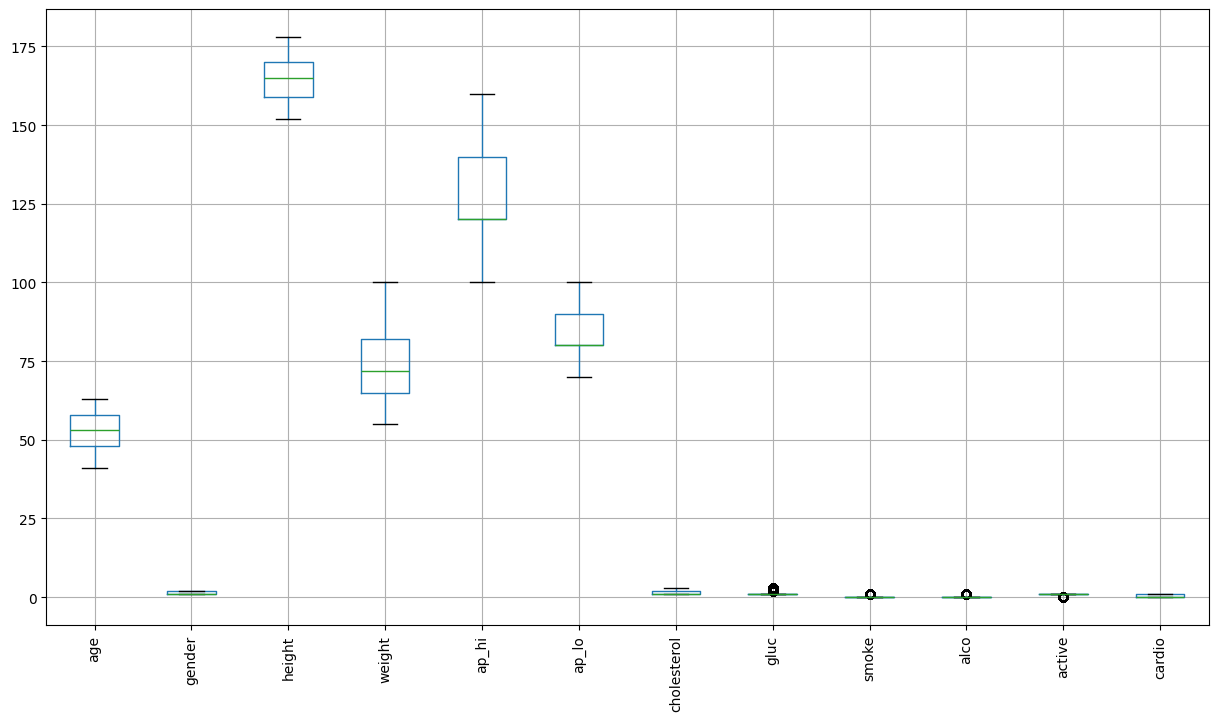

In [ ]:
plt.figure(figsize = (15,8))
df_capped.boxplot()
plt.xticks(rotation = 90)
plt.show()

###**Histogram**

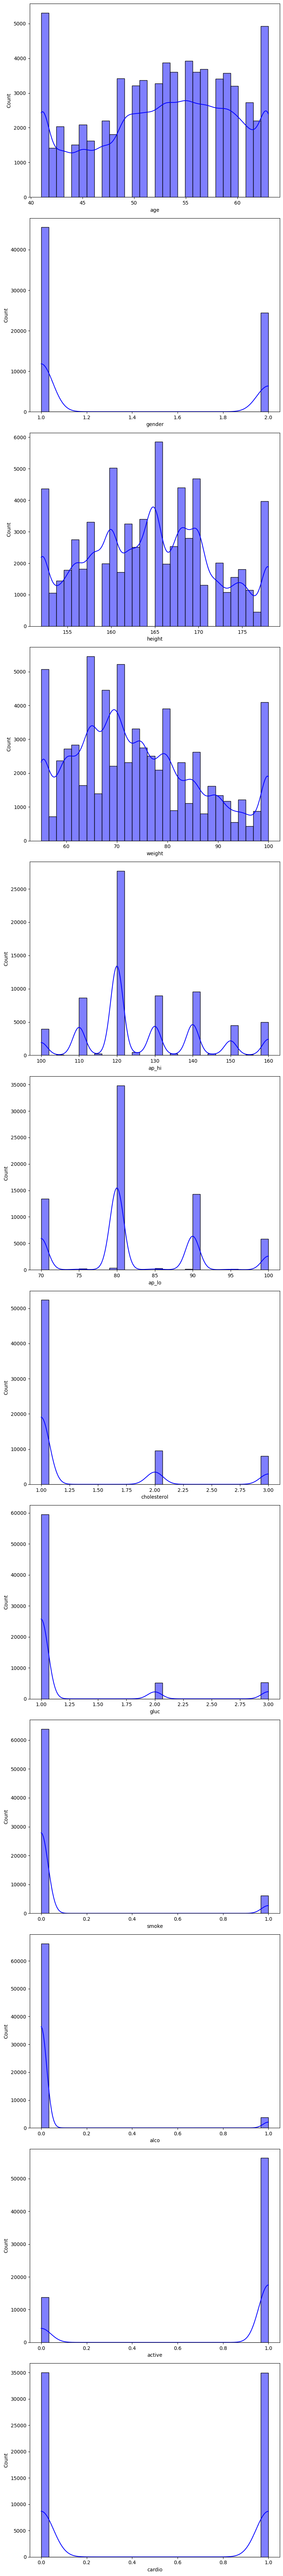

In [ ]:
# Create histograms for all columns
fig, axs = plt.subplots(nrows=len(df_capped.columns), ncols=1, figsize=(8, 6 * len(df_capped.columns)))

for i, col in enumerate(df_capped.columns):
    sns.histplot(df_capped[col], bins=30, kde=True, ax=axs[i], color='blue')

plt.tight_layout()
plt.show()

###**Pairplot**

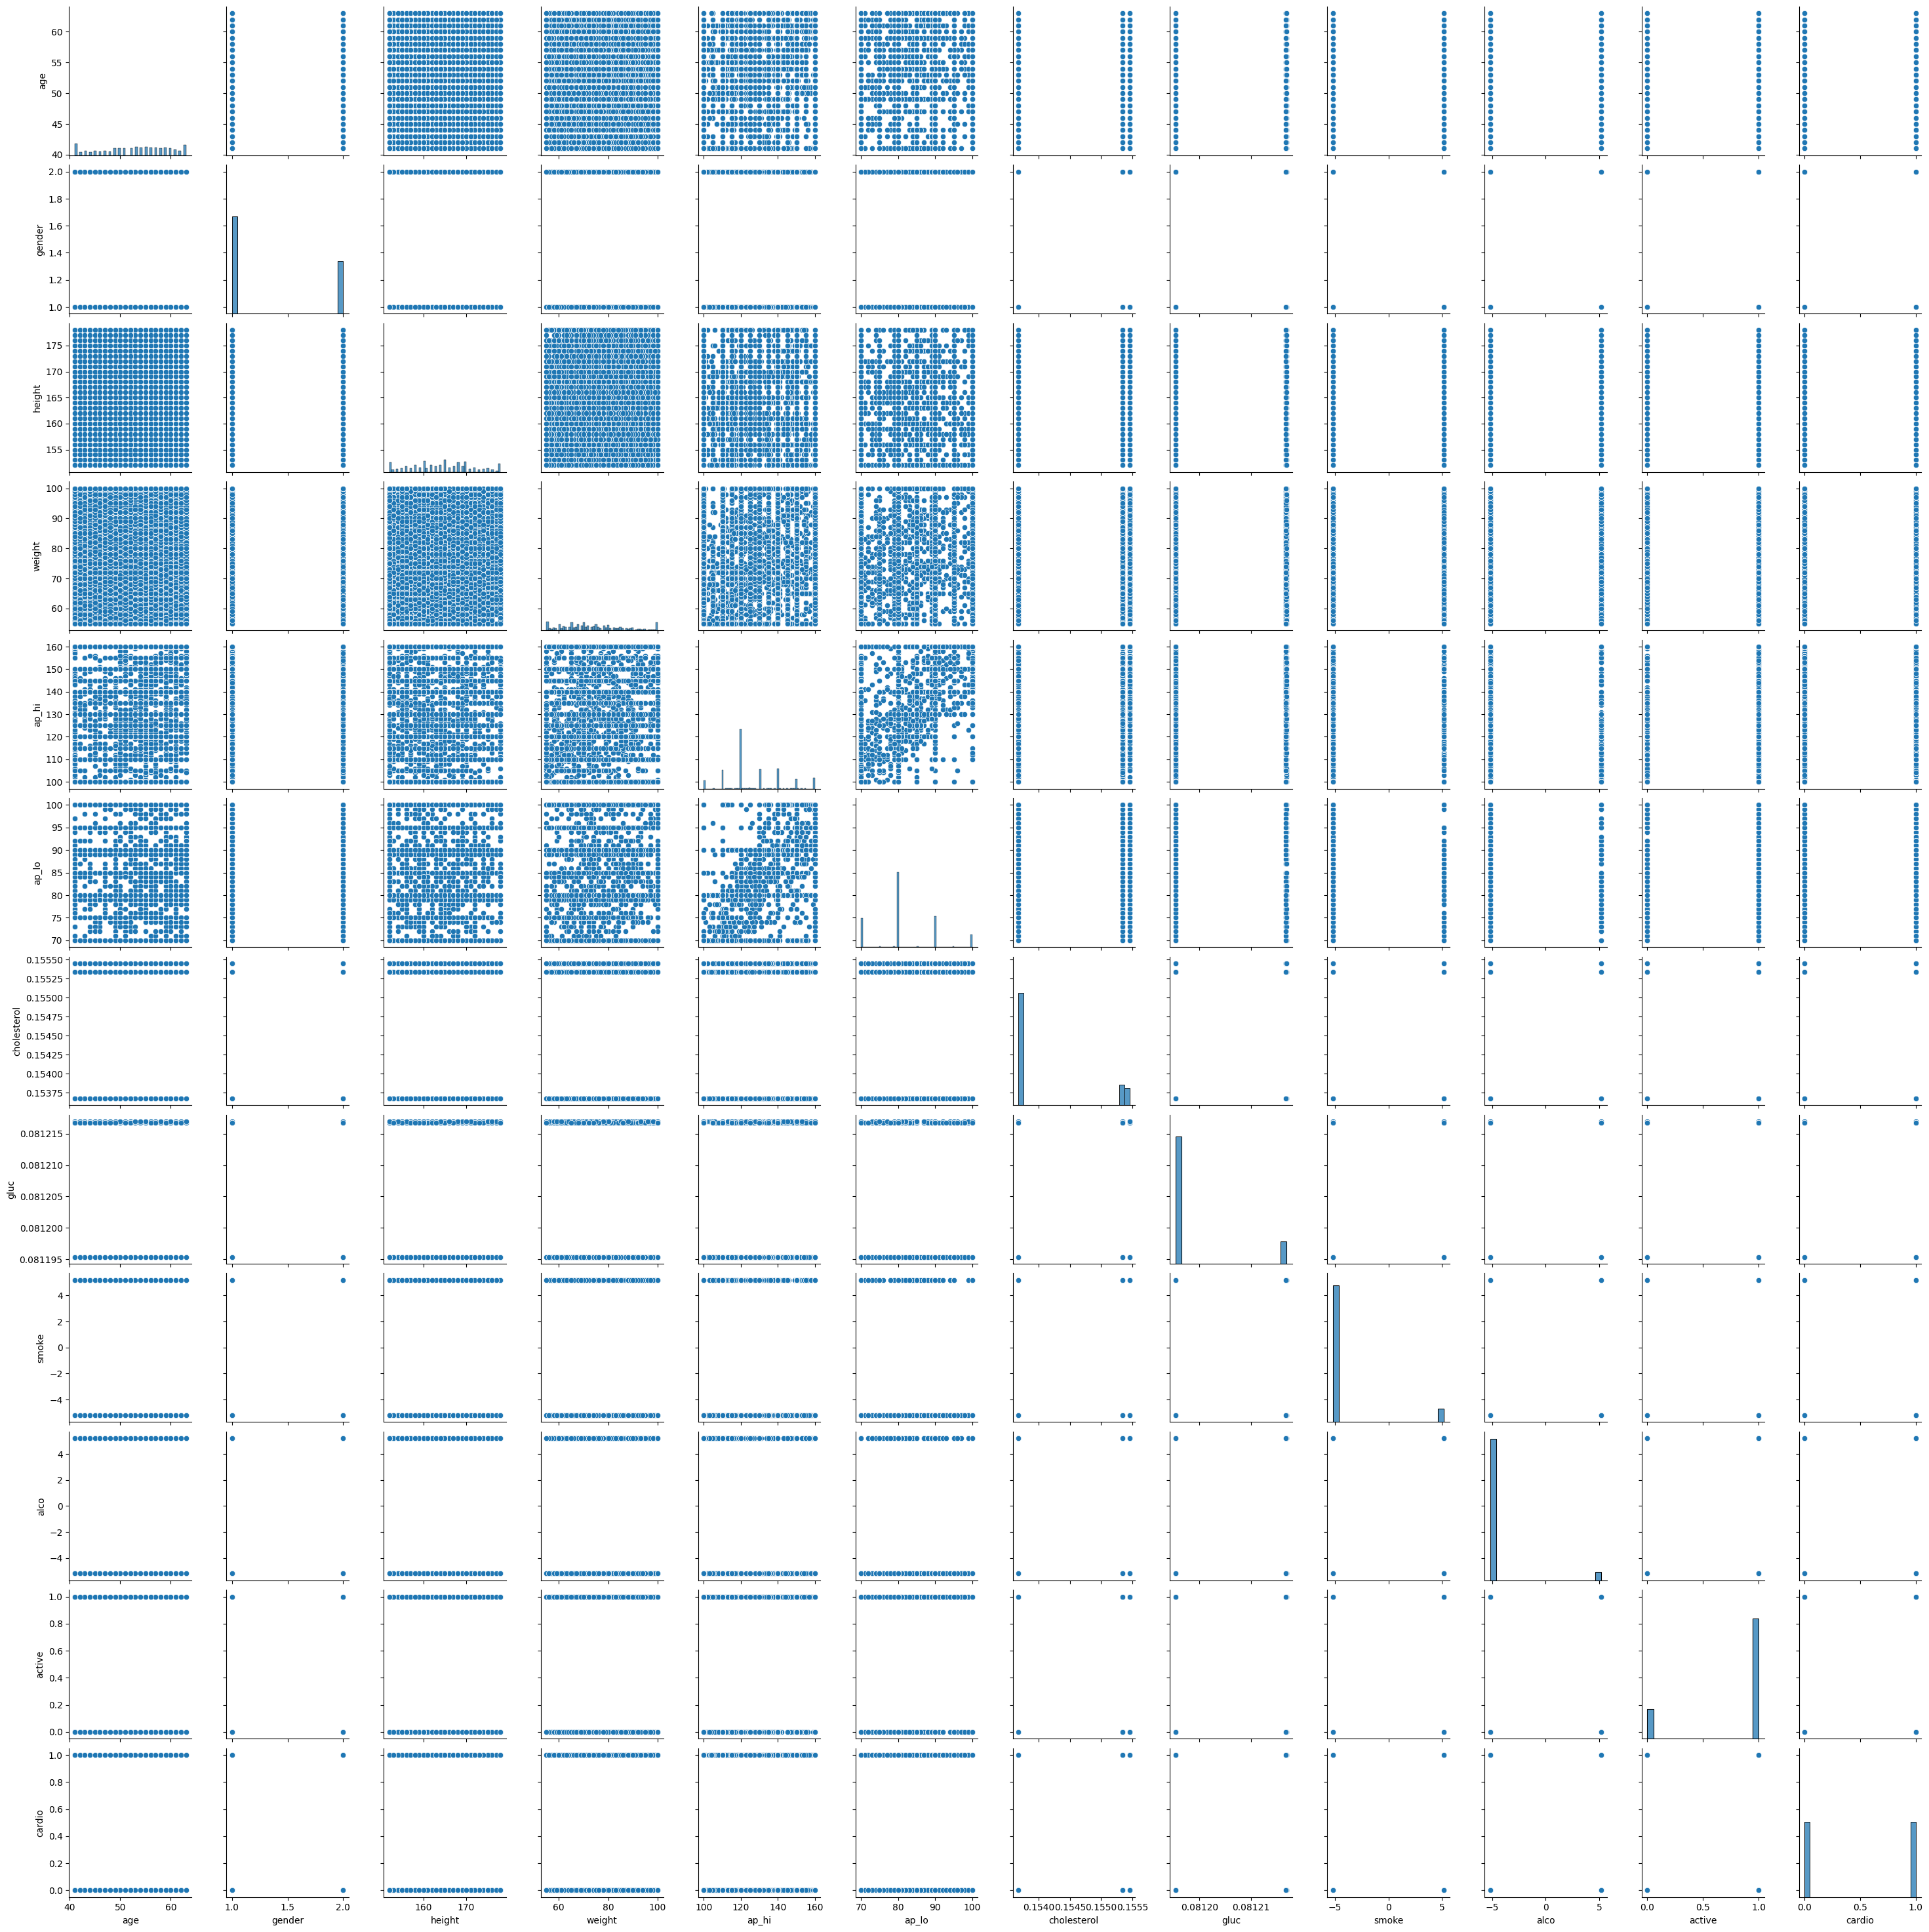

In [ ]:
sns.pairplot(df_capped)
plt.show()

###**Pie chart**

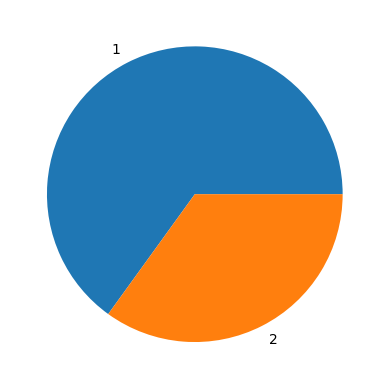

In [ ]:
plt.pie(df_capped['gender'].value_counts().values, labels=df_capped['gender'].value_counts().index)
plt.show()

###**Count plot**

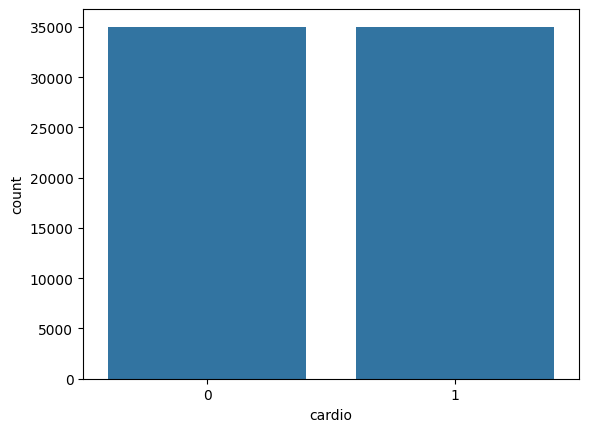

In [ ]:
sns.countplot(x=df_capped['cardio'])
plt.show()

##**7. Feature Engineering**

In [ ]:
Cat_cols = df_capped.select_dtypes(include=['object']).columns
Num_cols = df_capped.select_dtypes(include=['int64','float64']).columns

print("\n Number of Categorical Columns are : ", len(Cat_cols))
print("\n Number of Numerical Columns are : ", len(Num_cols))




 Number of Categorical Columns are :  0

 Number of Numerical Columns are :  12


#### **Since all columns in this dataset are numerical, no encoding is required.**

##**8. Feauture Selection**

Here I selected all 11 features for model building because eleven predictors constitute a low-dimensional feature space, well below the threshold where the “curse of dimensionality” becomes a concern.

In [ ]:
X = df_capped.drop(columns=['cardio'])  # 'cardio' is the target
y = df_capped['cardio']


In [ ]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,2,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,2,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,70,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1
69996,61,1,158,100.0,140,90,2,2,0,0,1
69997,52,2,178,100.0,160,90,3,1,0,1,0
69998,61,1,163,72.0,135,80,1,2,0,0,0


In [ ]:
y

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


##**9. Feature Scaling**

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.43871051,  1.36405487,  0.49946456, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [ 0.32184939, -0.73310834, -1.17445781, ..., -0.31087913,
        -0.23838436,  0.49416711],
       [-0.28659853, -0.73310834,  0.08098397, ..., -0.31087913,
        -0.23838436, -2.02360695],
       ...,
       [-0.13448655,  1.36405487,  1.89439987, ..., -0.31087913,
         4.19490608, -2.02360695],
       [ 1.23452128, -0.73310834, -0.1980031 , ..., -0.31087913,
        -0.23838436, -2.02360695],
       [ 0.47396137, -0.73310834,  0.77845162, ..., -0.31087913,
        -0.23838436,  0.49416711]])

##**10. Split Data into Training and Testing Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)
print("X_train : ", X_train.shape)
print("X_test : ", X_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)


X_train :  (56000, 11)
X_test :  (14000, 11)
y_train :  (56000,)
y_test :  (14000,)


###**Checking Class imbalance of the target variable**

In [ ]:
df_capped['cardio'].value_counts()

,count
cardio,
0,35021
1,34979


In [ ]:
#Calculate Class Imbalance Ratio
maj_cls = df_capped['cardio'].value_counts().max()
min_cls = df_capped['cardio'].value_counts().min()
ratio = maj_cls/min_cls

print(f"Class Imbalance Ratio: {ratio:.2f}")

Class Imbalance Ratio: 1.00


###**CIR Range**

**1.0 - 1.5 (Slight Imbalance)**

* No major adjustments needed
* Stratified Sampling in train-test split

**1.5 - 3.0 (Moderate Imbalance)**

* SMOTE (Synthetic Minority Over-sampling Technique)

**3.0 - 10.0 (High Imbalance)**

* SMOTE or ADASYN

**>10.0 (Extreme Imbalance)**

* Hybrid Approach: Over-sampling + Under-sampling
* Anomaly Detection Methods (One-Class SVM, Isolation Forest)

Based on the CIR range, our dataset exhibits acceptable balance,and no further adjustments are required.

##**11. Build the ML Model**

###**Models**

* **Logistic regression** is a classification algorithm that predicts the probabilities using a sigmoid function,making it ideal for binary classification tasks.

* **Support Vector Machine** (SVM) is a powerful supervised learning algorithm
  used primarily for classification tasks. It works by finding the optimal hyperplane that best separates data points of different classes with the maximum margin. The closest data points to this boundary are called support vectors, and they are critical in defining the decision boundary.

* **Random Forest** is a popular ensemble machine learning algorithm used for
  both classification and regression problems. It works by building multiple decision trees and combining their predictions to produce a more accurate and stable result.

* **Decision Tree** is a supervised learning algorithm used for both classification and regression tasks. It models decisions as a tree-like structure where each node represents a feature, each branch represents a decision rule, and each leaf represents an outcome or prediction.

* **K-Nearest Neighbors** (KNN) is a simple, non-parametric supervised learning algorithm used for classification and regression. It makes predictions based on the ‘K’ closest data points (neighbors) in the training set.

* **Gradient Boosting** is a powerful ensemble machine learning technique used for classification and regression. It builds a strong model by combining many weak learners (typically decision trees) in a sequential manner.

* **AdaBoost** (Adaptive Boosting) is a boosting ensemble technique used in machine learning to improve the performance of weak learners, typically decision trees.













In [ ]:
#importing required libraries for the model implementation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Defining models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier()
}

##**12. Model Evaluation -Classification Matrics**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
Accuracy: 0.7210
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



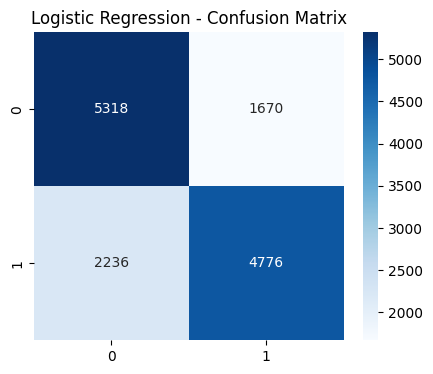


Support Vector Machine Performance:
Accuracy: 0.7263
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      6988
           1       0.78      0.63      0.70      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.72     14000
weighted avg       0.73      0.73      0.72     14000



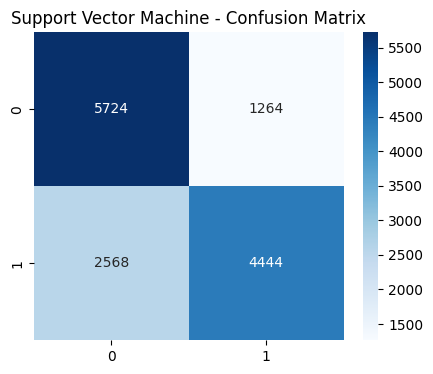


Random Forest Performance:
Accuracy: 0.7031
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      6988
           1       0.70      0.70      0.70      7012

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000



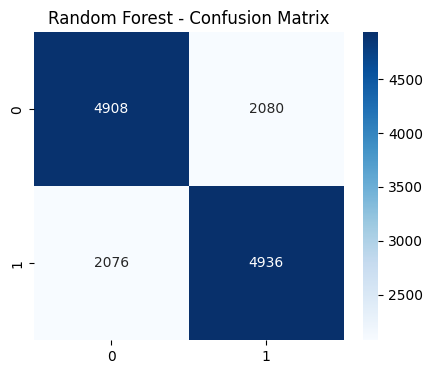


Decision Tree Performance:
Accuracy: 0.6404
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      6988
           1       0.65      0.62      0.63      7012

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



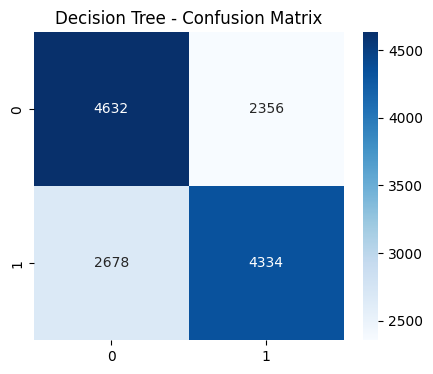


K-Nearest Neighbors Performance:
Accuracy: 0.6876
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      6988
           1       0.70      0.66      0.68      7012

    accuracy                           0.69     14000
   macro avg       0.69      0.69      0.69     14000
weighted avg       0.69      0.69      0.69     14000



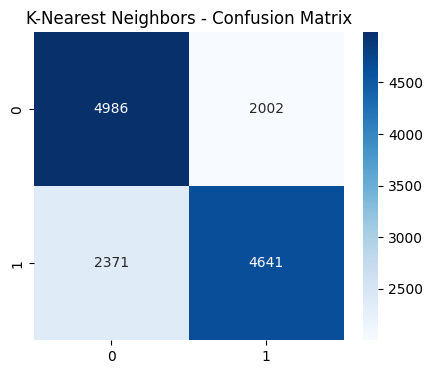


Gradient Boosting Performance:
Accuracy: 0.7387
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.76      0.71      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



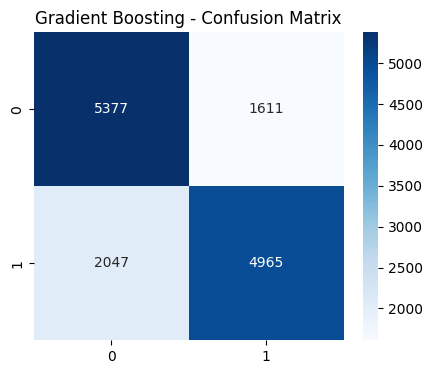


AdaBoost Classifier Performance:
Accuracy: 0.7308
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6988
           1       0.77      0.66      0.71      7012

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



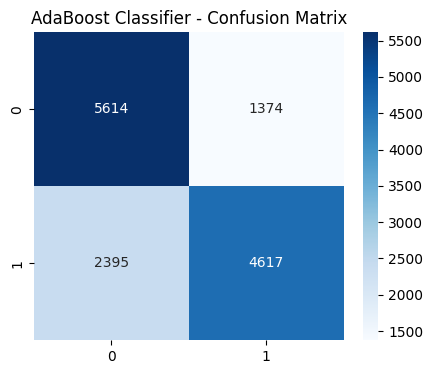

In [ ]:
# Train and Evaluate Models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    tr_acc = model.score(X_train, y_train)
    results.append({"Model": name, "Accuracy": acc, "Train Accuracy": tr_acc})

    print(f"\n{name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    #plt.xlabel("Predicted")
    #plt.ylabel("Actual")
    plt.show()

Among the models, **Gradient Boosting** achieved the highest accuracy of **73.87%**, along with strong precision, recall, and F1-score, making it the most effective overall. Close behind, the **Adaboost** also performed well with an accuracy of **73.08%*. **Support Vector Machine** and **Logistic Regression** followed with respectable accuracies above **72%**, showing that both models can perform okay on this dataset. In contrast, **Random Forest**, **K-Nearest Neighbors** (KNN), and **Decision Tree** lagged in performance, with **Decision Tree** being the weakest, indicating possible overfitting or lack of generalization. Overall, ensemble method, **Gradient Boosting** , demonstrated superior predictive power and generalization, suggesting it is the most suitable choices for this classification task.

###**ROC (Receiver Operating Characteristic) Curve**

The ROC (Receiver Operating Characteristic) Curve is a graphical tool used to evaluate the performance of a binary classification model. It plots the True Positive Rate (Recall) against the False Positive Rate at various classification thresholds.

* It helps visualize the trade-off between sensitivity and specificity.

* A model with a curve closer to the top-left corner indicates better
  performance.

* The AUC (Area Under the Curve) value summarizes the ROC curve into a single
  score — higher AUC means better model discrimination.

###**Components of ROC Curve**

* True Positive Rate (TPR) (Sensitivity) on the Y-axis

* False Positive Rate (FPR) (1 - Specificity) on the X-axis

A model with a perfect classification has an ROC curve that passes through the top left corner (TPR = 1, FPR = 0).
* AUC (Area Under the Curve)
  AUC measures the area under the ROC curve. Its value ranges between 0 and
  1.AUC = 1: Perfect model

  2.AUC = 0.5: Random guessing (no discrimination power)

  3.AUC < 0.5: Worse than random guessing

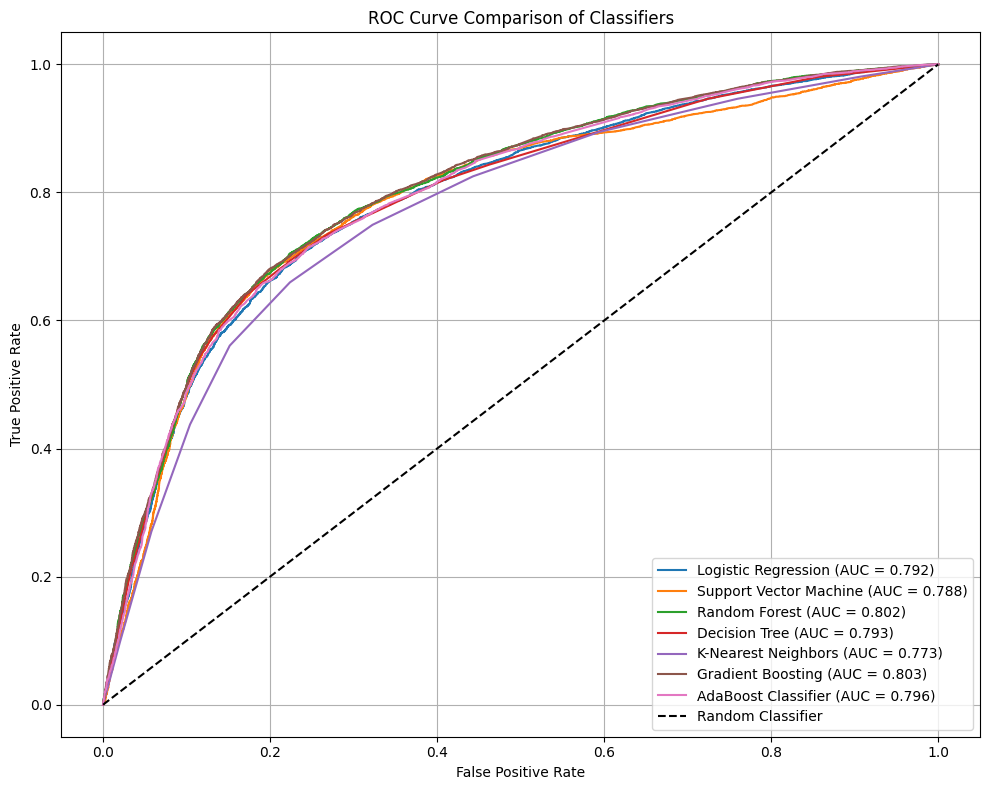

In [ ]:
from sklearn.metrics import roc_curve, auc
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

plt.figure(figsize=(10, 8))

# Plot ROC curve for each model
for name, model in models.items():
    model.fit(X_train, y_train)

    # Use predict_proba or decision_function depending on the model
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('ROC Curve Comparison of Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

###**Calculating Training and Testing Accuracy of models**

In [ ]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
                    Model  Accuracy  Train Accuracy
5       Gradient Boosting  0.738714        0.737107
6     AdaBoost Classifier  0.730786        0.726286
1  Support Vector Machine  0.726286        0.723054
0     Logistic Regression  0.721000        0.717179
2           Random Forest  0.703143        0.974375
4     K-Nearest Neighbors  0.687643        0.779446
3           Decision Tree  0.640429        0.974375


In [ ]:
results_df

,Model,Accuracy,Train Accuracy
5,Gradient Boosting,0.738714,0.737107
6,AdaBoost Classifier,0.730786,0.726286
1,Support Vector Machine,0.726286,0.723054
0,Logistic Regression,0.721000,0.717179
2,Random Forest,0.703143,0.974375
4,K-Nearest Neighbors,0.687643,0.779446
3,Decision Tree,0.640429,0.974375


* **Gradient Boosting** emerged as the top-performing model with a test accuracy of 0.7387, showing strong predictive capability and good generalization to new data.

* **Adaboost** model follows closely behind with 0.7307
  test accuracy, making it a solid alternative, although it slightly underperforms compared to Gradient Boosting.

* **Support Vector Machine** and **Logistic Regression** show moderate performance, with test
  accuracies around 0.72, indicating they are reasonably effective but not the most optimal.

* **Random Forest** and **Decision Tree** models have very high training
  accuracies (around 0.97), but much lower test accuracies, indicating that they are overfitting the training data and do not generalize well.

* **K-Nearest Neighbors** (KNN) also exhibits signs of overfitting, with a high
  training accuracy (0.7794) but a lower test accuracy (0.687).

* Overall, we can conclude that **Gradient Boosting** is the most reliable and best-performing model, balancing both accuracy and generalization.

##**13. Hyperparameter Tuning and Pipeline**

Hyperparameter tuning is the process of finding the best set of hyperparameters for a machine learning model to maximize its performance.

* Improve Model Performance
* Reduce Overfitting or Underfitting
* Enhance Generalization to Unseen Data
* GridSearchCV, RandomizedSearchCV, and Bayesian Optimization are some methods
  for hyperparameter tuning.



From the above evaluations, we conclude that **GradientBoosting** is the best model. So now lets try to increase its performance through Hyperparameter tuning




In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
gb_params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
gb = GradientBoostingClassifier(random_state=42)

# Instantiate the GridSearchCV
gb_grid = GridSearchCV(estimator=gb,
                       param_grid=gb_params,
                       cv=5,
                       n_jobs=-1,
                       scoring='accuracy',
                       verbose=1)

# Fit to training data
gb_grid.fit(X_train, y_train)



Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# Get the best model, best parameters, and accuracy
best_gb = gb_grid.best_estimator_
best_gb_params = gb_grid.best_params_
gb_accuracy = accuracy_score(y_test, best_gb.predict(X_test))

# Print results
print(f"Best GradientBoosting Model: {best_gb}")
print(f"Best Parameters: {best_gb_params}")
print(f"Accuracy: {gb_accuracy:.4f}")

Best GradientBoosting Model: GradientBoostingClassifier(learning_rate=0.05, max_depth=4, min_samples_split=5,
                           n_estimators=200, random_state=42)
Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.7401


After applying Hyperparameter tuning using **gridsearchCV** with 5‑fold cross‑validation over 243 hyperparameter combinations (1,215 total fits), the optimal Gradient Boosting model used 200 estimators, a learning rate of 0.05, and shallow trees (maximum depth of 4, with minimum samples per split = 5 and per leaf = 1).

**Gradient Boosting** model's accuracy improved to 74.01% after hyperparameter tuning.

Before tuning: Accuracy was 73.87%

After tuning: Accuracy is 74.01%

Tuning slightly improved the performance.

##**14. Save the Model**

In [ ]:
import joblib # Importing library

# Saveing the trained model
joblib.dump(best_gb, "gradient_boosting_model.joblib")
print("Model saved successfully!")

Model saved successfully!


##**Pipeline**

A machine learning **pipeline** was implemented to automate data preprocessing, feature selection, and model training, ensuring efficiency and reproducibility.

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
# parameters get from hyperparametertuning
gb_model = GradientBoostingClassifier(
     learning_rate= 0.05,
     max_depth= 4,
     min_samples_leaf= 1,
     min_samples_split= 5,
     n_estimators= 200,
)

#define pipeline
Pipeline = Pipeline(steps=[
     ('scaler', StandardScaler()),
     ('classifier',gb_model)
])

# Train the pipeline
Pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=4,
                                            min_samples_split=5,
                                            n_estimators=200))])

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6988
           1       0.77      0.66      0.71      7012

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



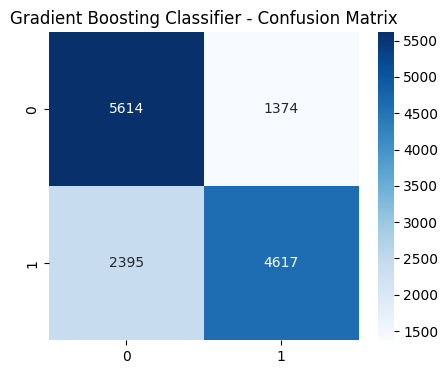

In [ ]:
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Gradient Boosting Classifier - Confusion Matrix")
plt.show()

###**Save Pipeline**

In [ ]:
import joblib

In [ ]:
# Saving the Pipeline
joblib.dump(Pipeline, 'pipeline.joblib')
print("Pipeline saved successfully!")


Pipeline saved successfully!


##**15. Test with Unseen Data**

In [104]:
# Load the  file
loaded_pipe = joblib.load('pipeline.joblib')

# Load the unseen test data
df_test = pd.read_csv('/content/unseen_data_csv.csv')

# Make prediction on the loaded unseen test data
predictions = loaded_pipe.predict(df_test)

# Print the predictions
print(predictions)

[0 1 0 1 1 0 1]


In [105]:
#display unseen data
df_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,32,1,170,65,125,85,1,1,0,0,1
1,45,2,175,75,140,90,2,2,1,1,0
2,28,1,168,70,120,80,1,1,0,0,1
3,38,2,172,60,130,85,3,3,0,0,1
4,50,1,180,80,150,95,1,1,1,1,0
5,60,2,165,55,110,75,2,2,0,0,1
6,42,1,178,85,160,100,1,1,1,1,0


This unseendata consists of 7 rows and 11 columns except target variable.The prediction output [0 1 0 1 1 0 1] corresponds to the model's assessment of cardiovascular risk for seven individuals in the unseen dataset. Each value represents whether a person is predicted to have cardiovascular disease (1) or not (0).

Based on these results:

The model predicts that **4** individuals  are at risk of cardiovascular disease.

The remaining **3** individuals are predicted to be no cardiovascular disease.

The prediction provides a useful preliminary screening tool but should always be interpreted alongside clinical judgment and further diagnostic testing.

##**16. Conclusion**

This project focused on predicting the risk of cardiovascular disease (CVD) based on various health parameters using various machine learning models. In this project, we explored multiple machine learning models to predict the presence of (CVD), with GradientBoosting emerging as the best-performing model after hyperparameter tuning.  It achieved good accuracy not high and balanced performance across metrics such as precision,recall and F1Score.

Key Findings:

* Data preprocessing, including capping for handling outliers, feature selection, and scaling, significantly improved model performance.

* Pipeline created for unseen data

When trained model applied to the unseen dataset, the model predicted the following outcomes: 4 out of 7 individuals  were flagged as at risk of cardiovascular disease (1), while 3 out of 7 were predicted to be disease-free (0). These predictions underscore the model’s capability to identify individuals at risk in new data. Although the results are promising, further steps—such as analyzing feature importance analysis, hyperparameter tuning, and real world validation—are recommended to enhance performance and ensure reliability in real-world settings.

This project illustrates how machine learning can assist in early detection of cardiovascular disease, supporting preventive care. With high-quality data and continued refinement, such models can serve as effective tools in clinical decision-making and public health monitoring.





















##**17.Future Work**

* **Explore Advanced Modeling Techniques**

 While Gradient Boosting Classifier showed good results, exploring deep learning algorithms such as neural networks or other ensemble methods (like XGBoost, LightGBM) could potentially offer higher accuracy and capture more complex patterns in the data.

* **Continuous Model Retraining**

 Periodically update and retrain the model with new patient data to adapt to evolving population health trends and maintain robustness over time.

* **Feature Expansion & Engineering**

 Incorporate additional clinical and lifestyle variables—such as family history, dietary habits, stress levels, or longitudinal measurements—and derive new features (e.g., blood pressure variability) to enrich the model’s predictive power.

